In [1]:
"""
Analyze Abl:Gefinitinib singlet (single fluorescent inhibitor) assay.

"""

from autoprotocol.unit import Unit
from assaytools.experiments import SingletAssay

#
# Competition assay
#

params = {
    'd300_xml_filename' : 'Src_Bos_Ima_96well_Mar2015 2015-03-07 1736.DATA.xml', # HP D300 dispense simulated DATA file
    'infinite_xml_filename' : 'Abl Gef gain 120 bw1020 2016-01-19 15-59-53_plate_1.xml', # Tecan Infinite plate reader output data
    'dmso_stocks_csv_filename' : 'DMSOstocks-Sheet1.csv', # CSV file of DMSO stock inventory
    'hpd300_fluids' : ['GEF001', 'IMA001', 'DMSO'], # uuid of DMSO stocks from dmso_stocks_csv_filename (or 'DMSO' for pure DMSO) used to define HP D300 XML <Fluids> block
    'hpd300_plate_index' : 1, # plate index for HP D300 dispense script
    'receptor_species' : 'Abl(D382N)', # receptor name (just used for convenience)
    'protein_absorbance' : 4.24, # absorbance reading of concentrated protein stock before dilution
    'protein_extinction_coefficient' : Unit(49850, '1/(moles/liter)/centimeter'), # 1/M/cm extinction coefficient for protein
    'protein_molecular_weight' : Unit(41293.2, 'daltons'), # g/mol protein molecular weight
    'protein_stock_volume' : Unit(165.8, 'microliters'), # uL protein stock solution used to make 1 uM protein stock
    'buffer_volume' : Unit(14.0, 'milliliters'), # mL buffer used to make 1 uM protein stock
    'rows_to_analyze' : ['A', 'B'], # rows to analyze
    'assay_volume' : Unit(100.0, 'microliters'), # quantity of protein or buffer dispensed into plate
    'measurements_to_analyze' : ['fluorescence top'], # which measurements to analyze (if specified -- this is optional)
    'wavelengths_to_analyze' : ['280:nanometers', '480:nanometers'], # which wavelengths to analyze (if specified -- this is optional)
}

# Create a single-point (singlet) assay.
assay = SingletAssay(**params)

# Load data
import cPickle as pickle
trace = pickle.load(open('output.pickle', 'r'))

There are 24 wells to analyze in the provided WellGroup
Solutions in use: set(['buffer', 'protein', 'DMSO', 'GEF001'])
assay-plate A1
{'Abl(D382N):Gefitinib': -6.8643428303622978, 'Abl(D382N)': -10.57806842464122, 'Gefitinib': -4.0959180111017108}
assay-plate A2
{'Abl(D382N):Gefitinib': -6.8858471702623989, 'Abl(D382N)': -9.9583304620671971, 'Gefitinib': -4.7371603135758349}
assay-plate A3
{'Abl(D382N):Gefitinib': -6.9625070819920447, 'Abl(D382N)': -9.0039646786207381, 'Gefitinib': -5.7681860087519388}
assay-plate A4
{'Abl(D382N):Gefitinib': -7.1467205166820476, 'Abl(D382N)': -8.1733597949875083, 'Gefitinib': -6.7830043270751723}
assay-plate A5
{'Abl(D382N):Gefitinib': -7.693091017791291, 'Abl(D382N)': -7.3962503932020418, 'Gefitinib': -8.1064842299698814}
assay-plate A6
{'Abl(D382N):Gefitinib': -8.1815552999572336, 'Abl(D382N)': -7.1433425233178527, 'Gefitinib': -8.847856382020014}
assay-plate A7
{'Abl(D382N):Gefitinib': -8.893170362472457, 'Abl(D382N)': -6.9778038162906704, 'Gefitini

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [3]:
well_name = 'A1'
(excitation_wavelength, emission_wavelength, geometry) = ['280:nanometers', '480:nanometers', 'top']
print trace['computed %(geometry)s fluorescence of well assay-plate %(well_name)s at excitation wavelength %(excitation_wavelength)s and emission wavelength %(emission_wavelength)s' % locals()][0]
well = assay.plate.well(well_name)
print well.properties['measurements']['fluorescence'][(excitation_wavelength, emission_wavelength, geometry)]

[ 23919.24718936  23983.32377063  23186.87903207  23816.46569127
  23998.88271829  24110.50409482  21998.22719279  24164.73183944
  24443.51492426  24133.08026846  23742.77200058  24812.72979856
  23767.39228693  24032.40738508  24080.93944022  22798.63854571
  23880.7936487   23325.59232042  22531.6004845   24053.02264829
  24014.3514048   22376.79930733  23974.98418967  23821.26277919
  23565.10977884  23588.91151925  23977.89434404  24388.55551198
  23849.26640281  23813.54317687  23565.62650058  23568.3443651
  22643.47718955  22278.58605537  22206.3396746   22729.9127674
  23659.17727504  23479.8552137   23718.59234976  23086.80496684
  23749.42696709  24092.34021175  23450.99518127  24288.97478915
  23657.08220871  23692.10114155  23486.92283043  24068.47436139
  23259.40241652  24175.82576743  23386.21433469  24825.87592242
  23178.53618704  24065.08036359  23986.37483986  23378.14181814
  23930.9095292   23032.04001116  22719.17649256  23319.2419397
  23280.96072476  22780.2922

binding affinities
well volumes
fluorescence
dispensed volumes
extinction coefficients
solution concentrations
well concentrations


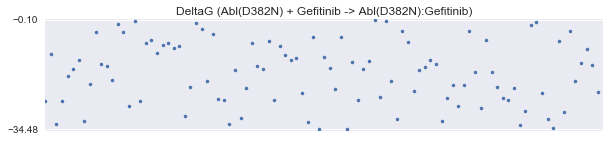

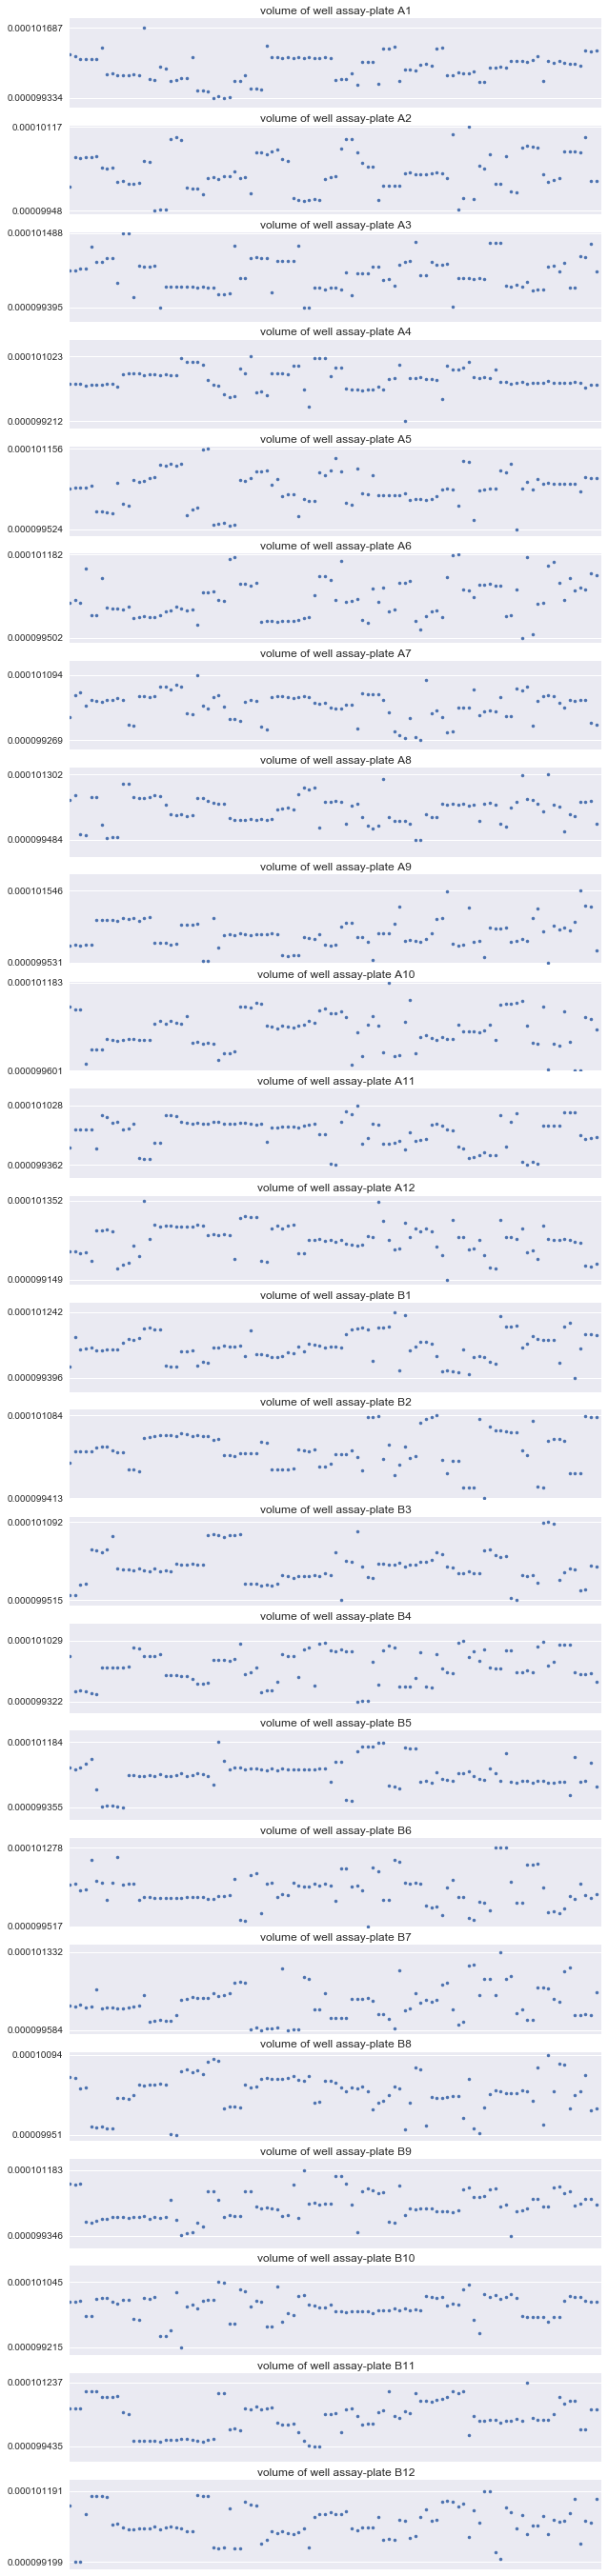

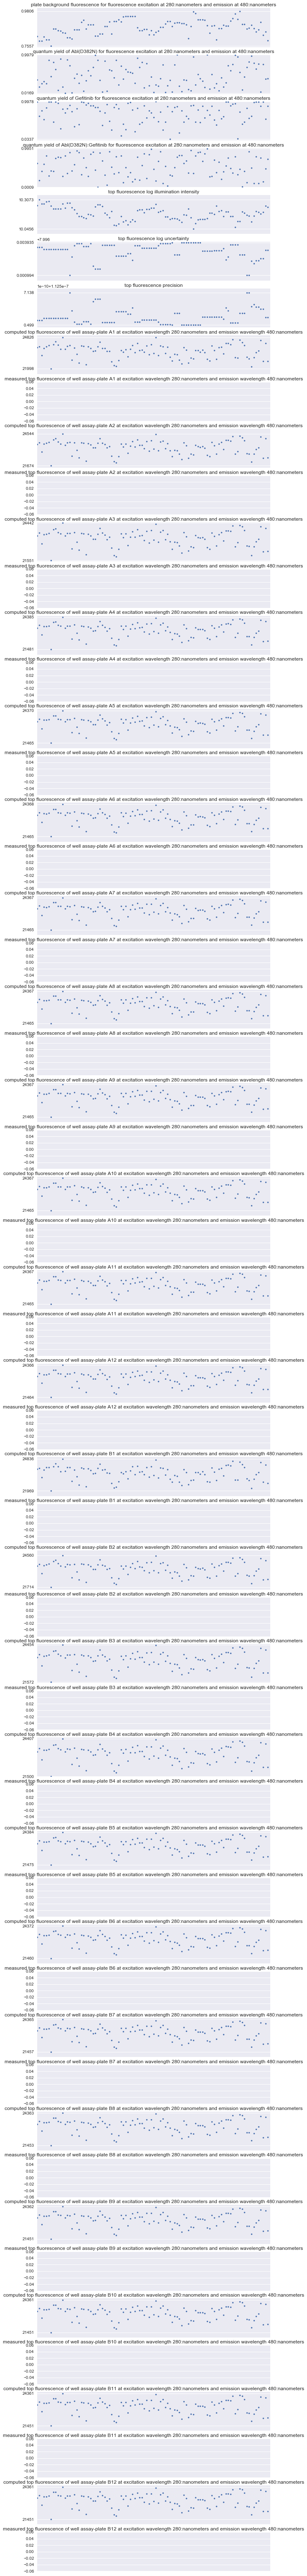

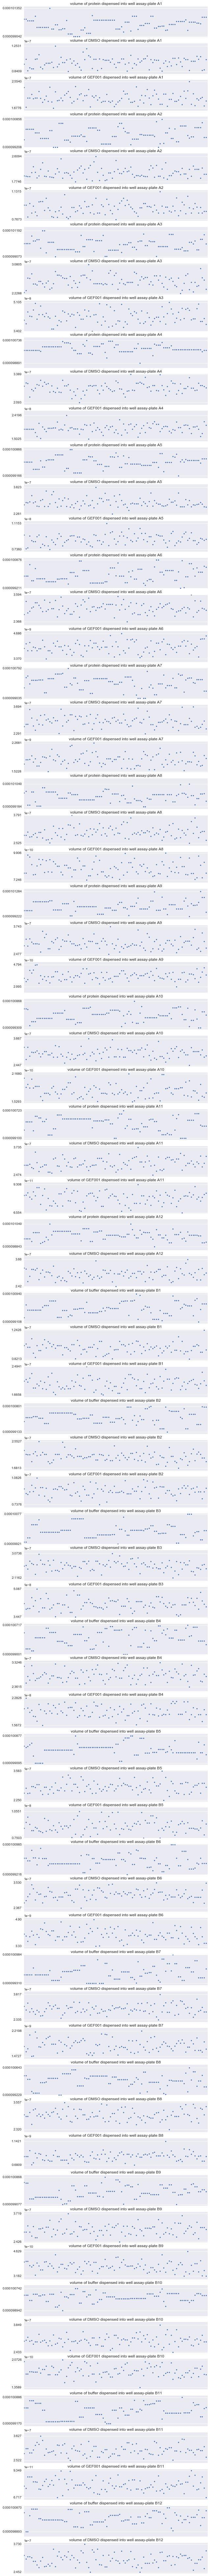

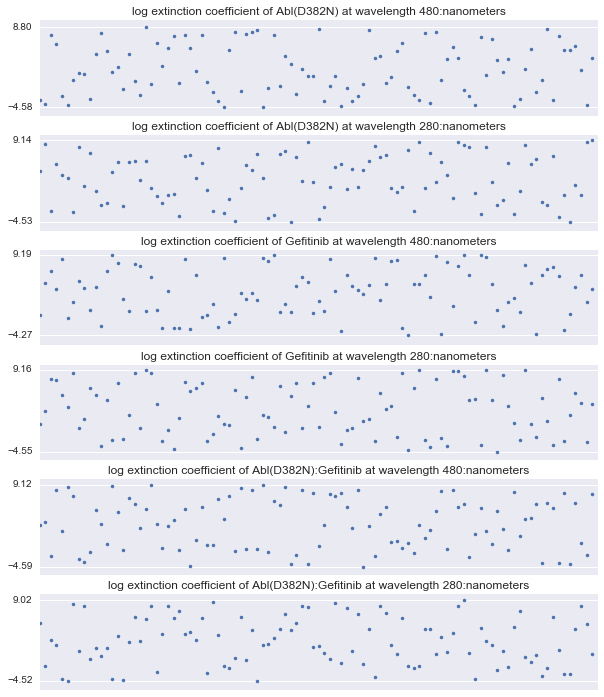

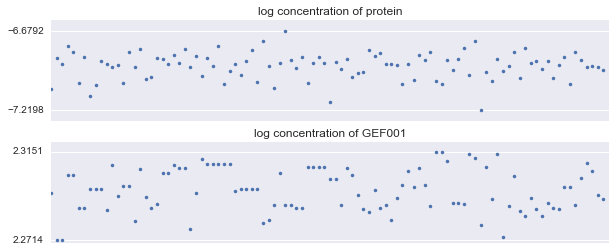

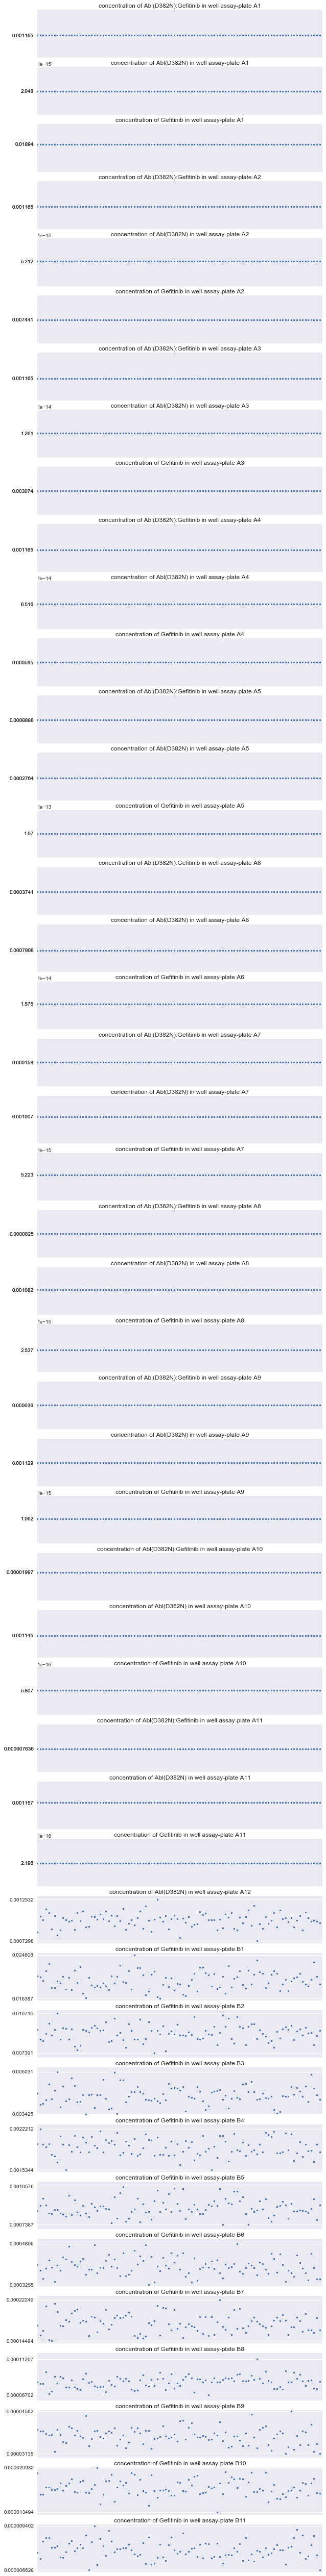

In [4]:
chain = 0
for group in assay.experiment.parameter_names.keys():
    print(group)
    parameters = assay.experiment.parameter_names[group]
    nparameters = len(parameters)
    plt.figure(figsize=[10,2*nparameters]);
    for (index,parameter) in enumerate(parameters):
        plt.subplot(nparameters,1,index+1);
        if parameter in trace:
            samples = trace[parameter][chain]
            plt.plot(samples, '.');
            plt.yticks([samples.min(), samples.max()]);
        else:
            plt.plot([], [], '.');
        plt.xticks([]);
        plt.title(parameter);


100


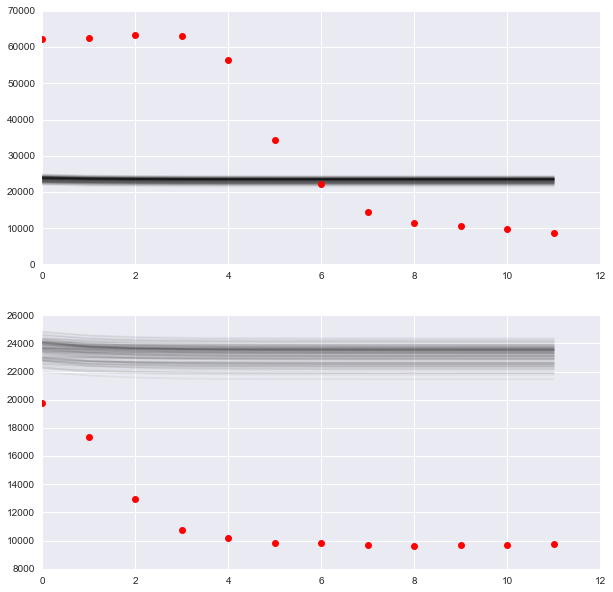

In [5]:
plt.figure(figsize=[10,10]);
ncols = 12
nsamples = len(trace['log concentration of protein'][0])
print(nsamples)
model = np.zeros([ncols,nsamples])
measured = np.zeros([ncols])
for (row_index, row) in enumerate(['A', 'B']):
    plt.subplot(2,1,row_index+1);
    plt.hold(True)
    for column_index in range(ncols):
        column = str(column_index+1)
        well_name = row + column
        (excitation_wavelength, emission_wavelength, geometry) = ['280:nanometers', '480:nanometers', 'top']
        well = assay.plate.well(well_name)
        measured[column_index] = well.properties['measurements']['fluorescence'][(excitation_wavelength, emission_wavelength, geometry)]        
        model[column_index,:] = trace['computed %(geometry)s fluorescence of well assay-plate %(well_name)s at excitation wavelength %(excitation_wavelength)s and emission wavelength %(emission_wavelength)s' % locals()][0][:]
    for sample in range(nsamples):
        plt.plot(range(ncols), model[:,sample], 'k-', alpha=0.05);
    plt.plot(range(ncols), measured, 'ro');

        
        